# Curve Fitting 1

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

### The mean as a model fitting solution



In [23]:
### Build some random data
rain1 = np.array([0.24, 0.26, 0.28, 0.18, 0.21, 0.23, 0.20, 0.24])
rain2 = np.array([0.02, 0.03, 0.06, 0.85, 0.01, 0.04, 0.80, 0.03])

df = pd.DataFrame(columns = ['rain1', 'rain2'])
df['rain1'] = rain1
df['rain2'] = rain2

df['mean1'] = df['rain1'].mean()
df['mean2'] = df['rain2'].mean()

0    0.23
1    0.23
2    0.23
3    0.23
4    0.23
5    0.23
6    0.23
7    0.23
Name: mean2, dtype: float64

How close is the mean to the data? Let's plot it:

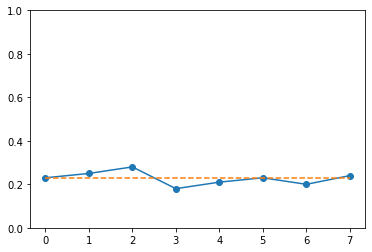

In [12]:
df['rain1'].plot(marker = 'o', ylim = (0, 1))
df['mean1'].plot(linestyle = '--')

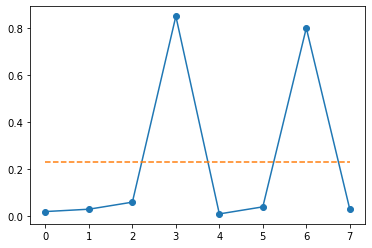

In [25]:
df['rain2'].plot(marker = 'o')
df['mean2'].plot(linestyle = '--')

<font color=green> __In which case does the mean fit better?__

<font color=green> __Standard deviation:__

<font color=green> __Goodness of fit:__

<font color=green> __Residual / predicted error:__

In [ ]:
<font color=green> __Optimization:__

<font color=green> __How is the mean like a model fit?__

In [ ]:
def rmse(yseries, yhat):
    return np.sqrt(1/(len(yseries) - 1) * sum((yseries[i] - yhat)**2 for i in range(len(yseries))))
### Call it like this: rmse(df['rain1'], y); plug in a few different values for y. How small can you get it?

After you've tried a few values above, run the code below. Did any of your values get a RMSE that small?

In [ ]:
print(rmse(df['rain1'], df['rain1'].mean()))

<font color=green> __What other "point models" can we fit and how?__

<font color=green> __Point estimate:__

### Fitting a line

Example data: Arctic sea ice extent.

In [92]:
df = pd.read_csv('data_79_17.csv', index_col=0)
df.head()

,0101,0102,0103,0104,0105,0106,0107,0108,0109,0110,...,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231
1979,14.7910,14.9970,14.9595,14.9220,14.9255,14.9290,14.9485,14.968,15.0790,15.1900,...,13.6190,13.6960,13.7730,13.8535,13.9340,14.0175,14.1010,14.0965,14.092,14.1460
1980,14.2000,14.2510,14.3020,14.3580,14.4140,14.4660,14.5180,14.556,14.5940,14.6295,...,13.7790,13.7885,13.7980,13.8990,14.0000,14.0860,14.1720,14.1325,14.093,14.1745
1981,14.2560,14.3560,14.4560,14.4455,14.4350,14.5620,14.6890,14.654,14.6190,14.6545,...,13.8850,13.8770,13.9465,14.0160,13.9845,13.9530,14.0405,14.1280,14.176,14.2240
1982,14.3515,14.4790,14.5605,14.6420,14.7610,14.8800,14.9365,14.993,15.0225,15.0520,...,13.9630,14.0280,14.0930,14.1380,14.1830,14.1635,14.1440,14.1515,14.159,14.2060
1983,14.2530,14.2795,14.3060,14.4000,14.4940,14.4805,14.4670,14.541,14.6150,14.6315,...,13.4325,13.5390,13.5395,13.5400,13.6020,13.6640,13.7595,13.8550,13.881,13.9070


In [93]:
# What are the values? Per-date average sea ice extent for each year from 1979 to 2017.
# To get annual averages, we calculate a mean along the rows:
df['mean'] = df.mean(axis=1)
df.head(5).iloc[:, -3:]

,1230,1231,mean
1979,14.092,14.1460,12.325240
1980,14.093,14.1745,12.323664
1981,14.176,14.2240,12.129721
1982,14.159,14.2060,12.444374
1983,13.881,13.9070,12.331118


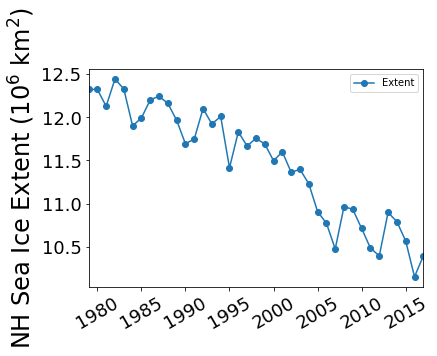

In [95]:
# Plot the annual average over time
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [96]:
# Let's calculate the overall mean: the mean of all the means
df['overall mean'] = df['mean'].mean()
df.head(5).iloc[:, -3:]

,1231,mean,overall mean
1979,14.1460,12.325240,11.471642
1980,14.1745,12.323664,11.471642
1981,14.2240,12.129721,11.471642
1982,14.2060,12.444374,11.471642
1983,13.9070,12.331118,11.471642


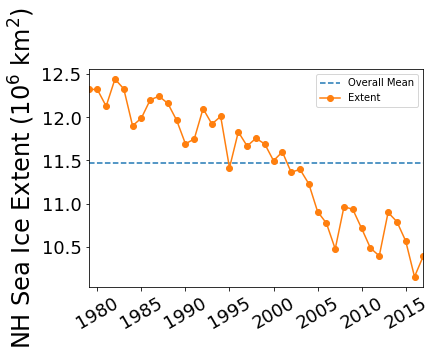

In [97]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [98]:
years_array = sm.add_constant(df.index.values)
model = sm.OLS(df['mean'], years_array)
results = model.fit()
results.params

const    121.754934
x1        -0.055197
dtype: float64

In [99]:
years_array[:5]

array([[1.000e+00, 1.979e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.981e+03],
       [1.000e+00, 1.982e+03],
       [1.000e+00, 1.983e+03]])

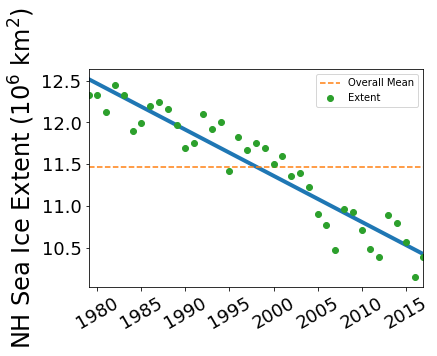

In [102]:
xs = np.arange(1979, 2018)
ys = results.params['x1'] * xs + results.params['const']
plt.plot(xs, ys, linewidth=4)
df['overall mean'].plot(linestyle='--', label='Overall Mean')
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [103]:
"out of ice in: " + repr(int(-results.params['const'] / results.params['x1']))

'out of ice in: 2205'

### Comparing the two models

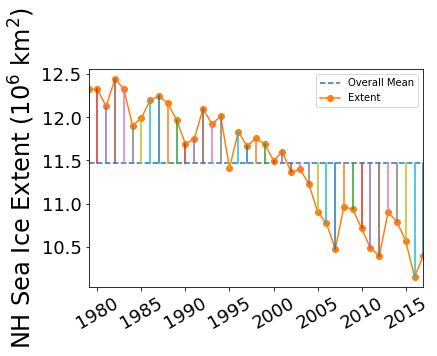

In [104]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
overall_mean = df['overall mean'].iloc[0]
plt.plot(xs, ys, linewidth=4)
df['overall mean'].plot(linestyle='--', label='Overall Mean')
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
sse_mean = 0
for x in df.index:
    plt.plot([x, x], [df.loc[x, 'mean'], overall_mean])
    sse_mean += (df.loc[x, 'mean'] - overall_mean)**2
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

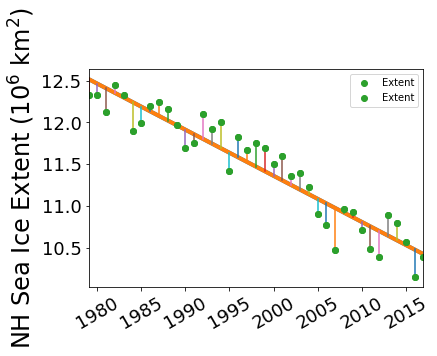

In [110]:
plt.plot(xs, ys, linewidth=4)
sse_line = 0
plt.plot(xs, ys, linewidth=4)
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
sse_line = 0
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [df.loc[xs[i], 'mean'], ys[i]])
    sse_line += (df.loc[xs[i], 'mean'] - ys[i])**2
df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [108]:
# Sum of squared residuals for our point estimate
sse_mean

16.885649511435062

In [111]:
# Sum of squared residuals for our linear model
sse_line

1.8349937997234653

In [112]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     303.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           2.03e-19
Time:                        12:05:12   Log-Likelihood:                 4.2635
No. Observations:                  39   AIC:                            -4.527
Df Residuals:                      37   BIC:                            -1.200
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.7549      6.331     19.232      0.000     108.928     134.582
x1            -0.0552      0.003    -17.421      0.000      -0.062      -0.049
==============================================================================
Omnibus:                        4.324   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.322
Skew:                          -0.343   Prob(JB):                        0.313
Kurtosis:                       2.021   Cond. No.                     3.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=green> __$\hat{y}$:__

In [113]:
for attr in dir(results):
    if 'mse' in attr.lower():
        print(attr)

mse_model
mse_resid
mse_total


In [114]:
results.mse_resid


0.04959442701955312

<font color=green> __Sum of squared error, SSE:__

<font color=green> __Mean squared error, MSE:__

<font color=green> __Root mean squared error, RMSE:__

<font color=green> __Simple linear regression:__

<font color=green> __Ordinary least squares, OLS:__

<font color=green>__Statistic:__  

<font color=green>__p-value:__

<font color=green>__Null hypothesis:__

<font color=green>__Pearson's correlation coefficient, $r$:__

<font color=green>__Coefficient of determination, $R^2$:__

<font color=green>__Model:__

<font color=green> __Multiple linear regression:__

<font color=green>__Polynomial regression:__

### Fitting a curve using simple linear regression

F

In [65]:
from bs4 import BeautifulSoup

In [63]:
def get_planet_frame():
    ''' list comprehensions, enumerate '''
    ''' transposes as it creates the lol '''
    soup = BeautifulSoup(open('planets.html'))
    rows = soup.table.find_all('tr')
    # rows.pop(0) is the header with the planet names but first td is blank
    index = [td.a.get_text().capitalize() for td in rows.pop(0).find_all('td')[1:]]
    rows.pop() # the last row is also a header - get rid of it
    columns = [tr.td.a.get_text() for tr in rows]
    data = [[] for i in range(len(index))]
    for row in rows:
        for i, td in enumerate(row.find_all('td')[1:]):
            data[i].append(td.get_text())
    return pd.DataFrame(data, index, columns)

<font color=green>__Optimization:__

<font color=green>__Minimization:__